<a href="https://colab.research.google.com/github/guscldns/TestProject/blob/main/0428/09_%EC%84%A0%ED%98%95%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

perch = pd.read_csv("perch.csv")

data = perch['length'].to_numpy() # 문제집, 행렬화 필요
target = perch['weight'].to_numpy() # 문제집, 행렬화 필요

In [5]:
data2 = data.reshape(-1, 1) # data는 1차원 행렬이라 2차원으로 변환 필요
# reshape(-1, 1) : 자동행 1열로 바꿔라 (-1 :자동행)

In [6]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(data2, target)

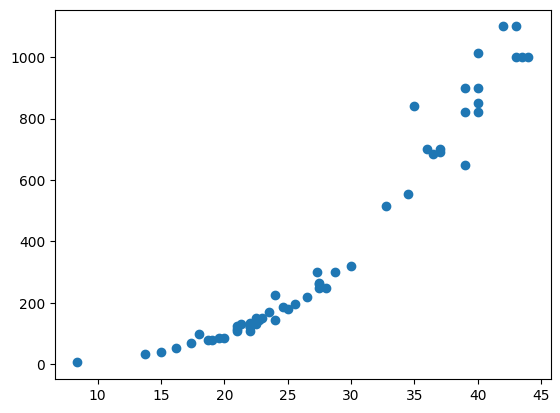

In [7]:
# K최근접 이웃 회귀로는 상기 (올라가는 데이터) 모델로는 오차가 심할 수 있음
# 선형 회귀에서 직선을 구해 예측하는 것이 더 효과적

from sklearn.linear_model import LinearRegression 
# 선형회귀 모델 라이브러리, 대소문자 구분 필수
import matplotlib.pyplot as plt

plt.scatter(perch['length'],perch['weight'])

In [8]:
# 선형회귀 새로운 모델 생성

lr = LinearRegression()
lr.fit(train_input, train_target) # 학습(훈련데이터로)
lr.score(test_input, test_target) # 평가(시험데이터로)
# k 최근접 이웃 회귀 모델 : 97% 나왔음 (전 수업)
# 분산에 표준편차를 나눔
# 최근접 보다 수치 낮음

0.9263610521644692

In [9]:
lr.coef_ # 기울기

array([37.384874])

In [10]:
lr.intercept_ # 절편 : 곡선과 만나는 점 
# x 절편: 곡선과 x축이 만나는 점  x=0, y 절편은 y축과 만나는 점

-665.3681805862174

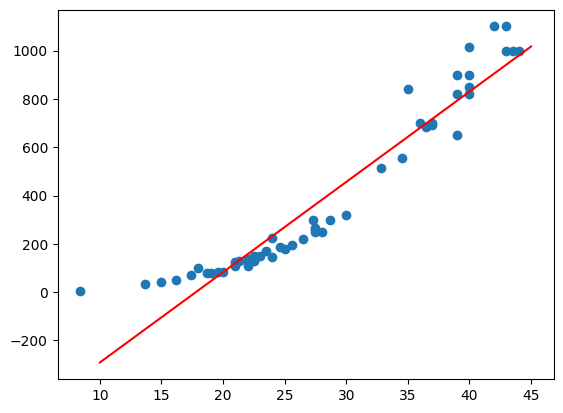

In [11]:
from sklearn.linear_model import LinearRegression 
import matplotlib.pyplot as plt

plt.scatter(perch['length'],perch['weight'])
plt.plot(range(10,46), lr.coef_ * range(10, 46) + lr.intercept_, 'red')
# plt.plot(range(10,46), lr.coef_ * range(10, 46) + lr.intercept_, 'red')
# 선형 그래프, 10에서 45까지, 기울기 곱하기 10에서 45, 절편을 더하고 붉은색으로 표시한다는 뜻
# 데이터 1개로는 곡선을 그릴 수 없어서 파란 점 데이터와 차이나는 것을 볼 수 있음
# 차이 때문에 정확도 낮음

In [13]:
# 특성이 1개라서 오차 큼 >> 특성 3개로 확인
perch2 = pd.read_csv("perch2.csv") # 특성 3개인 데이터 열기
perch2 # 특성이 3개라 데이터 표준화, 분할 필요

,length,height,width
0,8.4,2.11,1.41
1,13.7,3.53,2.00
2,15.0,3.82,2.43
3,16.2,4.59,2.63
4,17.4,4.59,2.94
5,18.0,5.22,3.32
6,18.7,5.20,3.12
7,19.0,5.64,3.05
8,19.6,5.14,3.04
9,20.0,5.08,2.77


In [14]:
train_input, test_input, train_target, test_target = train_test_split(perch2, target)
# 시험데이터 준비. imput은 위에 있어서 생략

In [17]:
# 평균 표준편차 구함
import numpy as np
mean = np.mean(train_input, axis = 0) # 평균, axis = 0 : 행방향, np : numpy, 행렬화
std = np.std(train_input, axis = 0) # 표준편차, axis = 0 : 행방향

train_scaled = (train_input - mean) / std # 표준화: 데이터 - 평균 / 표준편차
test_scaled = (test_input - mean) / std

lr = LinearRegression() # 새로운 모델 생성
lr.fit(train_scaled, train_target) # 학습
lr.score(test_scaled, test_target) # 평가
# 출력값을 통해 특성을 추가하니 정확도 올라간 것을 볼 수 있음

0.9433169092553457

In [31]:
# 특성이 3개라 기울기 값도 3개 나옴
lr.coef_

array([ 53.24784736, 119.35975125, 161.15197373])